<a href="https://colab.research.google.com/github/mjohnsonperimeter/cosmology_2019/blob/master/test_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install camb
!pip install healpy
!pip install pyshtools

  Using cached https://files.pythonhosted.org/packages/48/e9/c6915aca9af6dc0fe3765c0d2801761763cfb92531181eb217719399bd44/pixell-0.7.0.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [0]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
import healpy as hp
import astropy
import pyshtools


In [0]:
NSIDE=2**6
LMAX=3*NSIDE-1
ells=np.arange(0,LMAX+1)
cls1=ells**2
cls1[0]=0.0
bsize=1.*hp.pixelfunc.nside2resol(NSIDE)
map1 = hp.sphtfunc.synfast(cls1, NSIDE, lmax=LMAX, mmax=None, alm=False, pol=False, pixwin=False, fwhm=bsize, sigma=None, verbose=True)
alms1 = hp.sphtfunc.map2alm(map1,lmax=LMAX)
map2= hp.sphtfunc.alm2map(alms1,nside=NSIDE)
smoothmap1=hp.sphtfunc.smoothing(map1,fwhm=2*bsize)
smoothmap2=hp.sphtfunc.smoothing(map2,fwhm=2*bsize)


Sigma is 23.342668 arcmin (0.006790 rad) 
-> fwhm is 54.967783 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 46.685336 arcmin (0.013580 rad) 
-> fwhm is 109.935565 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 46.685336 arcmin (0.013580 rad) 
-> fwhm is 109.935565 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


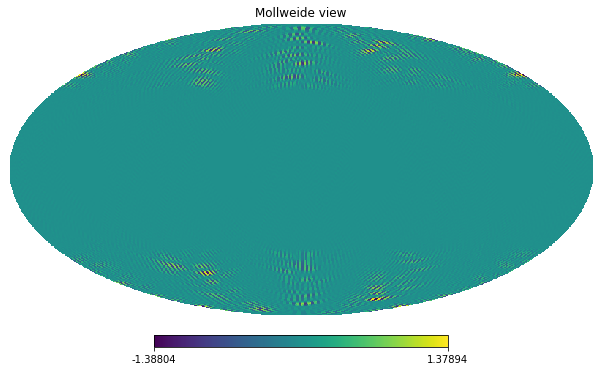

In [0]:
hp.mollview((map1-map2)/np.std(map1))

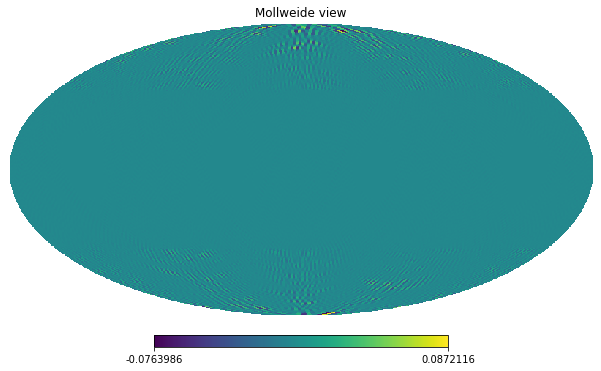

In [0]:
hp.mollview((smoothmap1-smoothmap2)/np.std(smoothmap1))

In [0]:
degrees = np.arange(LMAX, dtype=float)
# degrees[0] = np.inf
power = degrees**(2)

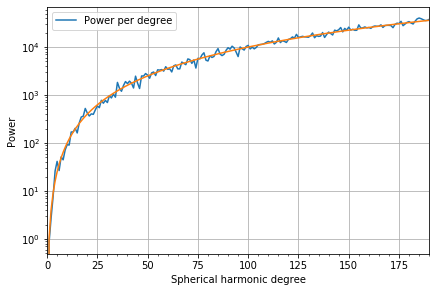

In [0]:
clm = pyshtools.SHCoeffs.from_random(power, seed=12345, normalization='ortho')
fig, ax = clm.plot_spectrum(show=False)
plt.semilogy(degrees,power)

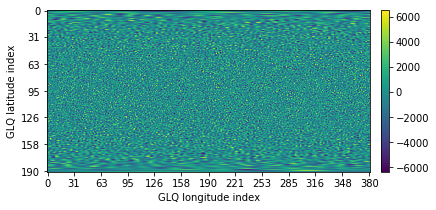

In [0]:
grid_glq = clm.expand(grid='GLQ')
fig, ax = grid_glq.plot(colorbar=True)

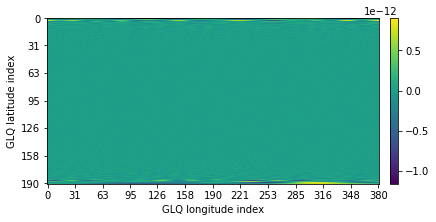

In [0]:
var=np.std(grid_glq.to_array())
clm_new = grid_glq.expand()
grid_new = clm_new.expand(grid='GLQ')
grid_diff=(grid_new-grid_glq)/var
fig, ax = grid_diff.plot(colorbar=True)

580.734405605852

In [0]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [0]:
#calculate results for these parameters
results = camb.get_results(pars)

In [0]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


(2551, 4)


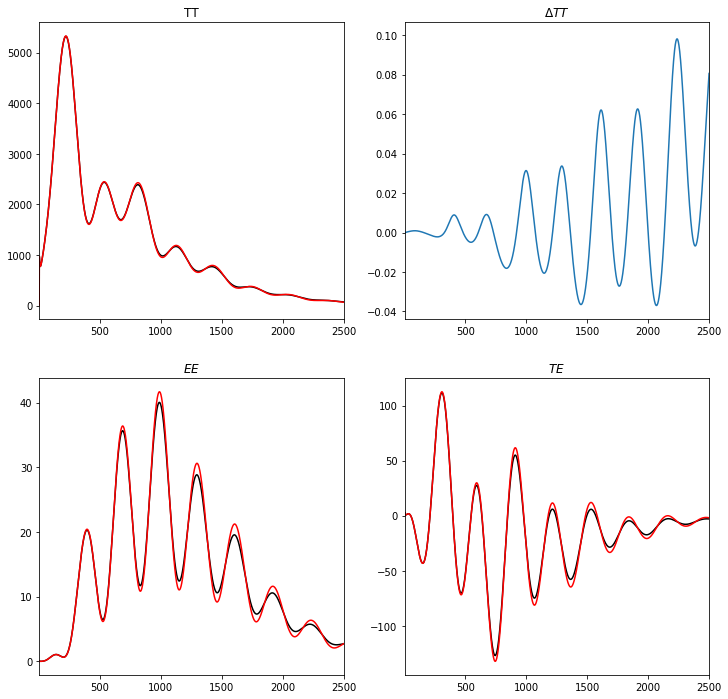

In [0]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$');
for ax in ax.reshape(-1): ax.set_xlim([2,2500]);

